In [2]:
# Plot H1 rejection rates

import pickle
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import os

In [3]:
Xdist = "uniform"
# sig = 0
testtype = "Wald"
fixedU = False
randomBeta = True
Model = "logistic"
Index = 1
n = 2000
Lapscale = 0.1
sig = 0.1

# number of vectors send
K = 5

UgenList = ["t3", "t5", "t10", "Ump1"]

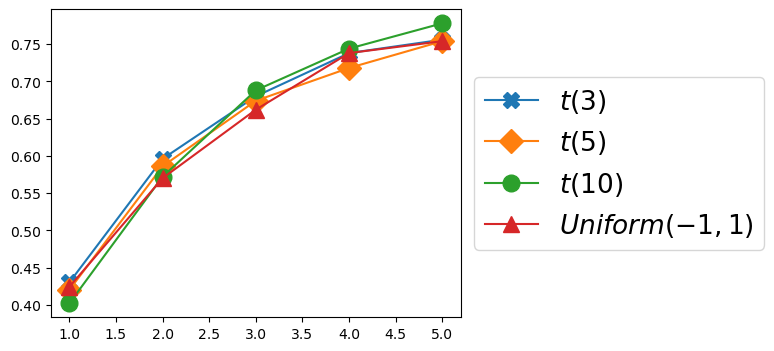

In [13]:
# number of data vectors sent
VecInd = np.array(range(1, (K+1)), int)
fig = plt.figure()
fig.set_size_inches(18, 4)   
#fig.suptitle(sigtype, fontsize=20) 

markerList = ["X", "D", "o", "^",  "P", "*"]   

ax = fig.add_subplot(int('13' + str(1)))
for UgenInd in range(len(UgenList)):
    Ugen = UgenList[UgenInd]
    fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta) + "_Ugen_" + str(Ugen)
    infile = open( Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
    new_dict = pickle.load(infile)
    infile.close()
    rej_array = new_dict["rej"]
    rej_results = np.mean(rej_array, axis = 0)


    if Ugen == "t3":
        SettingName = r'$t(3)$'
    elif Ugen == "t5":
        SettingName = r'$t(5)$'
    elif Ugen == "t10":
        SettingName = r'$t(10)$'
    elif Ugen == "Ump1":
        SettingName = r'$Uniform(-1,1)$'
    else:
        print("error")

    ax.plot(VecInd, rej_results, label = SettingName, marker = markerList[UgenInd], markersize=12)
    plt.legend(prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))

#===========================create folder to store output results=====================
results_path_data = "./Result_Figure/ResultsH1"
# Check whether the specified path exists or not
isExist = os.path.exists(results_path_data)

if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(results_path_data)
plt.savefig(Model + "_results/Result_Figure/ResultsH1/" + Model + "_Setting_" + str(Index) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta) +'.pdf')
